# Newton rings.

In [1]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

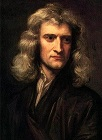
 *Sir Isaac Newton, (Woolsthorpe-by-Colsterworth, 1643 – Kensington, 1727).*


When Newton was experimenting with light and lenses he observed a dark spot on 
the lens which was on a glass plate. Closer inspection showed a set of 
alternating dark and light concentric rings. Newton analyzed this wave 
phenomenon although he was a supporter of the corpuscular theory of light.

Newton rings can be observed when a spherical glass surface lies on a flat glass. 
The reflections of a beam of light reflected from these surfaces will show an 
interference pattern. In these experiments the radius of curvature of the lens 
will be measured and the influence of replacing the refractive index of the film 
between the two glass surfaces will be investigated.
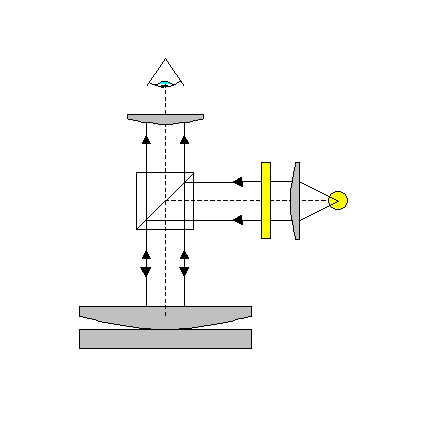
*Newton rings setup.*

### 1. Measurement of the radius of curvature of the lens.

   1.  How can the radius of curvature of the lens be determined if the radii 
        of the rings in the interference pattern are known? Derive an equation.
   2.  Choose a value for the wavelength of the (monochromatic) light beam.
   3.  Measure (use the mouse cursor in the image) the radii of the rings and plot the radii as a function of 
        the ring-number. (Plot such that you obtain a straight line!).
   4.  Determine the radius of curvature of the lens.


### 2. Questions.

   
   1.  What type of fringes are the Newton rings  (real vs. virtual / local vs. nonlocal). Explain why you need a lens to 
        observe the interference pattern.
   2.  What will happen with the fringes when the lens is deformed by pressing the 
        edges of the lens?
   3. Why would the central spot always we be dark? If not, what could be the cause of this?
   4.  What happens if the beam of light is not monochromatic but contains a large 
        number of wavelengths?

Literature: Hecht, 5th ed., chapter 9. 


In [2]:
%matplotlib notebook

#!/usr/bin/env python
"""
    Computer practical 4. Newton rings.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates the Newton rings experiment.
    Measure the radii of the rings and find the radius of curvature
    of the lens.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
    adapted by j.s.kanger 2019
    :license: MIT, see License for more details.
    
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import LightPipes as lp


# Define some constants
size = 5e-3  # size of the square image
N = 301  # number of pixels in the image
R = 150e-2  # Radius of the plano-convex lens
nf = 1.0  # refractive index of the medium between lens and substrate


# setup the figure
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
ax.axis('equal')
ax.set_title('Intensity distribution')

# define a matrix with the airgaps t
#t = np.ndarray((N,N))
span = np.linspace(-size/2, size/2, N, endpoint=True)
t = [(x**2 + y**2)/2/R for x, y in zip(*np.meshgrid(span, span))]
t = np.array(t)

    
def NewtonRingsSim(labda):
    """
    Calculates and shows the Newton rings
    """
    
    labda *= 1e-9  # convert to meters
    
    # define two plane waves
    F1 = lp.Begin(size, labda, N)
    F2 = lp.Begin(size, labda, N)
    
    # add phase to field 2 due to airgap
    Phi = 4 * np.pi * nf * t / labda + np.pi
    F2 = lp.SubPhase(Phi, F2)
    
    # sum the fields and calculate intensity
    Fsum = lp.BeamMix(F1, F2)
    I = lp.Intensity(0, Fsum)
    
    # plot the intensity as an image
    ax.contourf(I, 25, cmap='hot')
    ax.format_coord = lambda x, y: \
                        f'x = {(-size/2 + x*size/(N-1))/1e-3:2.2f} mm, \
                            y = {(-size/2 + y*size/(N-1))/1e-3:2.2f} mm, \
                            Intensity = {I[int(x)][int(y)]:2.4f} a.u.'     
    plt.show()
    
    return None
    
w = interact(NewtonRingsSim,
           labda=widgets.FloatSlider(description='$\lambda$ [nm]', min=300.0, max=1000.0, step=1, value=530.0, \
                                     continuous_update=False, readout_format='.1f')
          )

help: https://opticspy.github.io/lightpipes/NewtonRings.html